<a href="https://colab.research.google.com/github/wadudh/Deep-learning--Churn_prediction/blob/main/churn%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [26]:

url = 'https://raw.githubusercontent.com/wadudh/Deep-learning--Churn_prediction/main/customerchurn.csv'
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
df.drop('customerID',axis='columns',inplace=True)

In [28]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [29]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [30]:
pd.to_numeric('TotalCharges')

ValueError: ignored

In [31]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull().sum()

11

In [32]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]
df.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [33]:
df1=df[df.TotalCharges!=' ']
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [35]:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [36]:
df1['TotalCharges']=df1.TotalCharges.astype(float)

<ipython-input-36-af712a2c32fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges']=df1.TotalCharges.astype(float)


In [37]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Data Visualisation

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


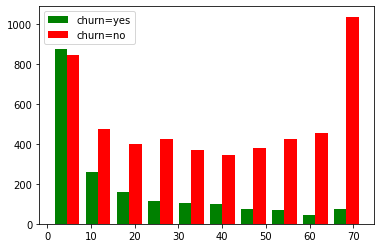

In [38]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure



plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'], label=['churn=yes','churn=no'])
plt.legend()

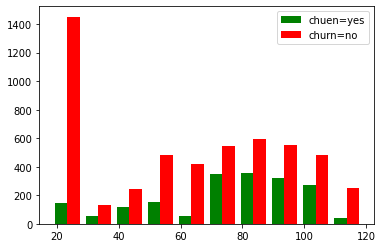

In [39]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.hist([mc_churn_yes,mc_churn_no],color=['green','red'],label=['chuen=yes','churn=no'])
plt.legend()


Many of the columns are yes, no etc. Let's print unique values in object columns to see data values



In [52]:
from pandas.core.sorting import unique_label_indices
def unique_val(df):
    for column in df1:
        if df1[column].dtypes=='object':
            print(f'{column}: {df1[column].unique()}')
unique_val(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 0]
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [47]:
df1=df1.replace('No phone service','No')
df1 =df1.replace('No internet service','No')

In [53]:
df1 =df1.replace('Yes',1)
df1 =df1.replace('No',0)
df1


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [51]:
unique_val(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 0]
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [54]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

In [55]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 0]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [56]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [57]:
df1.gender.unique()

array([1, 0])

One hot encoding for categorical columns



In [58]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [59]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3081,0,0,0,0,4,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2705,1,0,1,0,72,1,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1308,0,1,0,0,16,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1725,1,1,0,0,17,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1999,0,0,0,0,23,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [60]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [61]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [62]:
for col in df2:
    print(f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

Train test split



In [63]:
from sklearn.model_selection import train_test_split

x=df2.drop('Churn',axis=1)
y=df2['Churn']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [64]:
x_train.shape

(5625, 26)

In [65]:
x_test.shape

(1407, 26)

In [66]:
x_train.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2968,0,0,0,0,0.028169,1,0,0,1,1,...,0,0,1,1,0,0,0,0,1,0
6044,1,0,0,1,0.154930,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1784,1,0,0,0,0.042254,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2693,0,0,0,0,1.000000,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
6697,1,0,0,0,0.408451,1,1,1,0,1,...,0,1,0,0,1,0,0,1,0,0


In [67]:
len(x_train.columns)

26

Build a model (ANN) in tensorflow/keras



In [68]:
import tensorflow as tf
from tensorflow import keras

In [79]:
model = keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')

])
model.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5161 - accuracy: 0.7419
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.7913
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.7980
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.7996
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8037
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8044
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8075
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8053
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8078
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4047 - accura

In [80]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.5078 - accuracy: 0.7633


[0.5078202486038208, 0.7633262276649475]

In [81]:
yp=model.predict(x_test)

44/44 [==============================] - 0s 1ms/step


In [82]:
yp

array([[0.36076495],
       [0.6352275 ],
       [0.00357794],
       ...,
       [0.73705554],
       [0.5644186 ],
       [0.35649133]], dtype=float32)

In [88]:
y_pred=[]
for element in yp:
  if element>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

y_pred[:5]

[0, 1, 0, 0, 0]

In [97]:
import sklearn 


#import scikitplot as skplt

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       999
           1       0.61      0.50      0.55       408

    accuracy                           0.76      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.75      0.76      0.76      1407



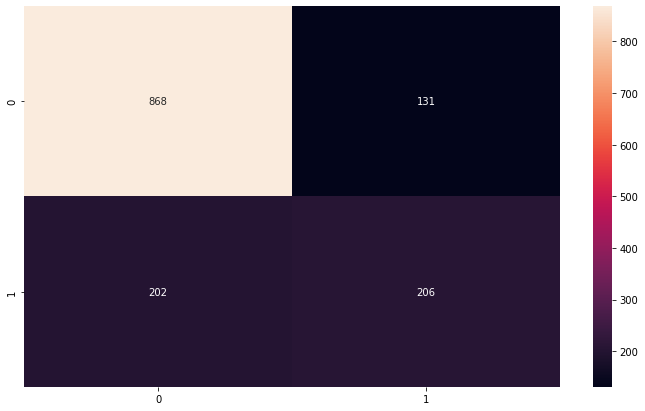

In [103]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(12,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel=('predicted')
plt.ylabel=('truth')


Bank Churn Prediction

In [105]:
url='https://raw.githubusercontent.com/zunicd/Bank-Churn-Prediction/master/Resources/Churn_Modelling.csv'

data=pd.read_csv(url)
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6266,6267,15590097,Ch'eng,537,Spain,Female,33,7,136082.00,1,1,0,62746.54,0
3085,3086,15571059,Martin,734,France,Female,54,3,0.00,1,1,0,130805.54,1
8415,8416,15758031,Lazarev,760,Spain,Male,38,3,91241.85,1,0,1,80682.35,0
2408,2409,15754112,Musgrove,653,Spain,Male,55,7,0.00,2,1,1,41967.03,0
8179,8180,15576077,Kelly,610,France,Female,27,9,159561.93,1,0,1,103381.47,0


In [106]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [108]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [109]:
data.drop(['RowNumber','CustomerId','Surname','Geography'],axis=1,inplace=True)

In [110]:
data.dtypes

CreditScore          int64
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


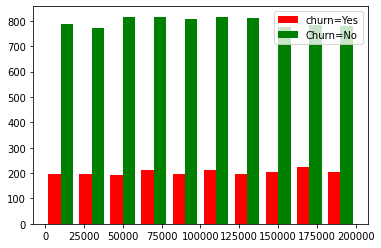

In [127]:
exited_salary =data[data.Exited==1].EstimatedSalary
not_exited_salary =data[data.Exited==0].EstimatedSalary

plt.hist([exited_salary,not_exited_salary],color=['red','green'],label=['churn=Yes','Churn=No'])
plt.legend()

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<function matplotlib.pyplot.legend(*args, **kwargs)>

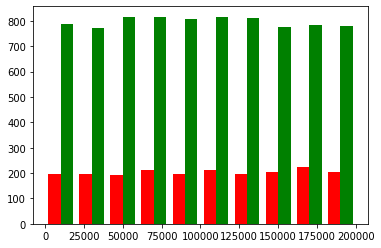

In [120]:
exited_tenure =data[data.Exited==1].Tenure
not_exited_tenure =data[data.Exited==0].Tenure

plt.hist([exited_salary,not_exited_salary],color=['red','green'],label=['churn=Yes','Churn=No'])
plt.legend

In [146]:

for column in data:
  print(f'{column}:{data[column].unique()}')


CreditScore:[0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.43

In [140]:
data.Gender.replace({'Female':0,'Male':1},inplace=True)

In [143]:
cols_to_scale=['CreditScore','Balance','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
data[cols_to_scale]=sc.fit_transform(data[cols_to_scale])

In [149]:
x=data.drop('Exited',axis=1)
y=data['Exited']

In [153]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=10)

print(x_train.shape,x_test.shape)

(8000, 9) (2000, 9)


In [155]:
len(x_train.columns)

9

In [160]:
model= keras.Sequential([
    keras.layers.Dense(5,input_shape=(9,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')

])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.8342 - accuracy: 0.6582
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6086 - accuracy: 0.7667
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5457 - accuracy: 0.7950
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5091 - accuracy: 0.7979
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.7981
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.7994
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.8008
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4602 - accuracy: 0.8033
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4556 - accuracy: 0.8052
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4529 - accura

In [161]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.4560 - accuracy: 0.7995


[0.45599833130836487, 0.7994999885559082]

In [166]:
yp = model.predict(x_test)
y_pred = []
for num in yp:
  if num>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

y_pred[:9]

63/63 [==============================] - 0s 1ms/step


[0, 0, 1, 0, 1, 0, 0, 0, 0]

In [167]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1578
           1       0.54      0.33      0.41       422

    accuracy                           0.80      2000
   macro avg       0.69      0.63      0.65      2000
weighted avg       0.78      0.80      0.78      2000



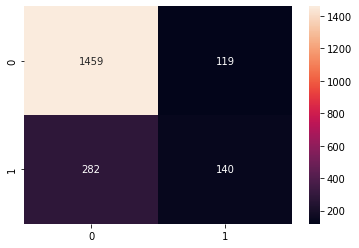

In [171]:
cm=tf.math.confusion_matrix(labels = y_test,predictions=y_pred)

sns.heatmap(cm,annot=True,fmt='d')